In [118]:
%matplotlib inline

import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams['axes.facecolor']='white'
# plt.style.use('bmh')

import geopandas as gpd
import pandas as pd
# import cartopy.crs as ccrs

In [52]:
# Drop columns we don't need:
# Here we will drop the columns that do not serve in our specific analysis.
def remove_zeros(df):
    """" Here we will drop the records of zeroes that do not serve in our specific analysis.
    """
    pud = df[(df['PUD_YR_AVG']>0)]
    return pud

def find_proportion(gdf, column):
    """Here we want to take the sum of the yearly average. and divide each entry by this value. 
    Parameters: gdf = geopandas dataframe
                column = column of interest located within the gdf geopandas dataframe.
    gdf[column + proportion_sum] = a specific gdf column  / sum(gdf with a specific column) 
        """
    gdf[column + 'proportion_sum'] = gdf[column] / np.sum(gdf[column]) 
    assert gdf[column].shape == gdf[column + "proportion_sum"].shape
    return gdf[column + 'proportion_sum']



In [160]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:
    

    base = plt.cm.get_cmap(base_cmap)
#     color_list = base(np.linspace(0, 1, N))
    color_list = base(np.array([0., 0.001, 0.002, 0.004, 0.008, 0.016, 0.032, 1.]))
    
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

In [177]:
def pudMap(file, column, metadata, shpname):
    """ Reads the shape file and from the list of file names selects the specified file to make a plot
        we may also want to apply the normalizing functions we defined earlier where the default is the annual
        average.
    """
    # make a geopandas dataframe. 
    shp = gpd.read_file(file)
#     shp = remove_zeros(shp)
    find_proportion(shp, column)
    
    # Create a figure of the desired size:
    fig = plt.figure(figsize=(10,10))  
    ax = plt.axes()
    ax.grid(False)
    plt.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        right='off',
        left='off',
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off',
        labelleft='off') # labels along the bottom edge are off

    plt.suptitle(metadata['parkname'], fontsize=16)
    plt.title(metadata['parkvis'], fontsize=14)
    fig.text(.12,.08,metadata['cellsize'], fontsize=12)
    
    # define the bins and normalize
#     bounds = [0.0, 0.01, 0.02, 0.04, 0.08, 1]
#     cmap = plt.cm.BuPu_r
#     cmap = discrete_cmap(8, 'viridis')
    cmap = plt.cm.viridis
    cmap.set_under(color='dimgray')

    plot = shp.plot(ax=ax, 
                    column = column + 'proportion_sum',
#                     cmap = 'BuPu', 
                    cmap = cmap, 
                    vmin=0.0000001,
                    edgecolor='none',
#                     scheme='fisher_jenks',
                    k=7,
                    legend = True)
    
#     plot = shp.plot(ax=ax, column = column + 'proportion_sum',cmap = cmap_discretize('inferno', 10), legend = True)
    plt.savefig(os.path.join('../data/maps/', shpname + '.png'))
#     return plot
    return 0

In [166]:
results_dir = '../data/InVEST_OUTPUT/'
list_all_files = os.listdir(results_dir)

In [167]:
list_files = []
for names in list_all_files:
    if names.endswith(".shp"):
        list_files.append(names)

In [168]:
metadata = pd.read_csv('../matt/ParkBounds/All_NPS_Park_Bounds_Ranked.csv')

In [179]:
metadata

,UNIT_CODE,GIS_Notes,UNIT_NAME,DATE_EDIT,STATE,REGION,GNIS_ID,UNIT_TYPE,CREATED_BY,METADATA,PARKNAME,Park,Rank,2016_Visit
0,OLYM,LEGACY: contact allen_mccoy@nps.gov for additi...,Olympic National Park,2015/04/22,WA,PW,1530459,National Park,Legacy,NaN,Olympic,Olympic NP,7,3390221
1,MEVE,Lands - http://landsnet.nps.gov/tractsnet/docu...,Mesa Verde National Park,2009/08/04,CO,IM,179042,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/104...,Mesa Verde,Mesa Verde NP,34,583527
2,GRBA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Great Basin National Park,2009/09/10,NV,PW,862430,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/104...,Great Basin,Great Basin NP,49,144846
3,GAAR,Lands - http://landsnet.nps.gov/tractsnet/docu...,Gates of the Arctic National Park,2016/09/21,AK,AK,1416040,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/222...,Gates of the Arctic,Gates of the Arctic NP & PRES,59,10047
4,ACAD,LEGACY: NPS Inventory and Monitoring Program D...,Acadia National Park,2013/12/18,ME,NE,578853,National Park,Legacy,NaN,NaN,Acadia NP,8,3303393
5,KICA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Kings Canyon National Park,2011/10/17,CA,PW,255948,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/218...,Kings Canyon,Kings Canyon NP,31,607479
6,BLCA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Black Canyon of the Gunnison National Park,2017/05/12,CO,IM,203271,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/104...,Black Canyon of the Gunnison,Black Canyon of the Gunnison NP,46,238018
7,GLBA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Glacier Bay National Park,2016/09/21,AK,AK,1416041,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/222...,Glacier Bay,Glacier Bay NP & PRES,37,520171
8,PEFO,Lands - http://landsnet.nps.gov/tractsnet/docu...,Petrified Forest National Park,2017/05/10,AZ,IM,23864,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/220...,Petrified Forest,Petrified Forest NP,29,643274
9,KATM,Lands - http://landsnet.nps.gov/tractsnet/docu...,Katmai National Park,2016/09/21,AK,AK,1416045,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/222...,Katmai,Katmai NP & PRES,53,37818


In [ ]:
for i in list_files:
    shpname = i
    shp_path = os.path.join(results_dir, shpname)
    split_name = shpname.split('_')
    rank = int(split_name[2])
    cellsize = split_name[3]
    parkdata = metadata[metadata.Rank == rank]
    parkname = parkdata['Park'].values[0]
    parkvis = str(round(parkdata['2016_Visit'].values[0]/1e6, 2)) + ' million visitors'
    parkmeta = {'parkname':parkname, 'parkvis':parkvis, 'cellsize':str(cellsize) + ' meter cells'}
    pudMap(shp_path, "PUD_YR_AVG", parkmeta, i)

/home/dmf/miniconda3/envs/smt-env/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [104]:
shpname = list_files[0]
shp_path = os.path.join(results_dir, shpname)

In [107]:
split_name = shpname.split('_')
rank = int(split_name[2])
cellsize = split_name[3]
print(rank)
print(cellsize)

27
879


In [108]:
parkdata = metadata[metadata.Rank == rank]

In [109]:
parkdata

,UNIT_CODE,GIS_Notes,UNIT_NAME,DATE_EDIT,STATE,REGION,GNIS_ID,UNIT_TYPE,CREATED_BY,METADATA,PARKNAME,Park,Rank,2016_Visit
17,CRLA,Lands - http://landsnet.nps.gov/tractsnet/docu...,Crater Lake National Park,2017/06/05,OR,PW,1163670,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/224...,Crater Lake,Crater Lake NP,27,756344


In [110]:
parkname = parkdata['PARKNAME'].values[0]
parkvis = str(round(parkdata['2016_Visit'].values[0]/1e6, 2)) + ' million visitors'
parkmeta = {'parkname':parkname, 'parkvis':parkvis, 'cellsize':str(cellsize) + ' meter cells'}

In [82]:


# # Create a figure of the desired size:
# fig = plt.figure(figsize=(5,5))  
# ax = plt.axes()
# ax.grid(False)
# plt.tick_params(
#     axis='both',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     right='off',
#     left='off',
#     bottom='off',      # ticks along the bottom edge are off
#     top='off',         # ticks along the top edge are off
#     labelbottom='off',
#     labelleft='off') # labels along the bottom edge are off

# plt.suptitle(parkname, fontsize=14)
# plt.title(parkvis, fontsize=10)

# # shp.plot(ax=ax, column="PUD_YR_AVG")
# pudMap(shp_path, "PUD_YR_AVG")

In [151]:
shp_path

'../data/InVEST_OUTPUT/pud_results_10_924_2005_2014.shp'

AttributeError: 'ListedColormap' object has no attribute 'from_list'

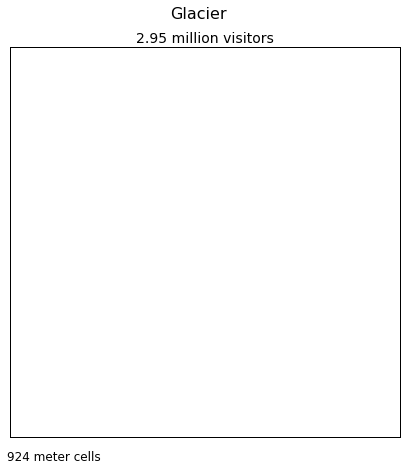

In [164]:
pudMap(shp_path, "PUD_YR_AVG", parkmeta)